In [1]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adagrad, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# check missing
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
X = df.drop(['Outcome'],axis=1)
y = df.Outcome

In [6]:
# Split X and Y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, stratify = y, random_state = 987)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.15, stratify = y_train, random_state = 987)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(587, 8) (587,)
(104, 8) (104,)
(77, 8) (77,)


In [ ]:
# 5-point summary describe()
# univaritae analysis
# bi-variate analysis
# pairplot - multi variate
# correlation matrix
# feature selection

In [7]:
# lets scale
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)
X_test_scale = scaler.transform(X_test)

In [8]:
# Shape of input === number of features
print(X_train_scale.shape[1],)

8


In [9]:
# Lets build the Model
model = Sequential()
# No of Input will be == (total number of train examples , 8)
# where 8 = feature
model.add(Input(shape=(X_train_scale.shape[1],)))

# Hidden Layer 1
model.add(Dense(units=64,activation='relu'))
# Hidden Layer 2
model.add(Dense(units=32,activation='relu'))
# Hidden Layer 3
model.add(Dense(units=16,activation='relu'))

# Output Layer - this is a binary classification
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(X_train_scale,y_train,
                    validation_data=(X_val_scale, y_val),epochs=100,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 21ms/step - loss: 0.6365 - accuracy: 0.6831 - val_loss: 0.5887 - val_accuracy: 0.7500
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.5607 - accuracy: 0.7513 - val_loss: 0.5302 - val_accuracy: 0.7788
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.7700 - val_loss: 0.4887 - val_accuracy: 0.7692
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7717 - val_loss: 0.4627 - val_accuracy: 0.7596
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4546 - accuracy: 0.7819 - val_loss: 0.4442 - val_accuracy: 0.7596
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.7905 - val_loss: 0.4454 - val_accuracy: 0.7692
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4348 - accuracy: 0.7956 - val_loss: 0.4506 - val_accuracy: 0.7788
Epoch 8/100


In [ ]:
y_pred_train= model.predict(X_train_scale)
y_test_train=model.predict(X_test_scale)

In [12]:
model.save('a_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!wget <URL>

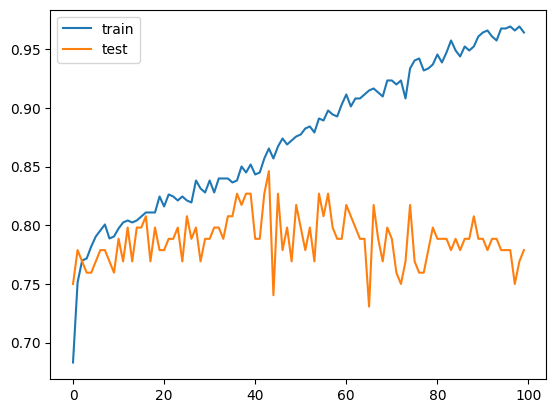

In [13]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Let add regularization - Dropout

In [14]:
# Lets build the Model
model = Sequential()
# No of Input will be == (total number of train examples , 8)
# where 8 = feature
model.add(Input(shape=(X_train_scale.shape[1],)))

# Hidden Layer 1
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
# Hidden Layer 2
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
# Hidden Layer 3
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))

# Output Layer - this is a binary classification
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train_scale,y_train,validation_data=(X_val_scale, y_val),epochs=100,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 0.6938 - accuracy: 0.5281 - val_loss: 0.6692 - val_accuracy: 0.6346
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.6763 - val_loss: 0.6273 - val_accuracy: 0.6538
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6105 - accuracy: 0.6899 - val_loss: 0.5781 - val_accuracy: 0.7019
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.7291 - val_loss: 0.5311 - val_accuracy: 0.7404
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.5266 - accuracy: 0.7394 - val_loss: 0.5104 - val_accuracy: 0.7404
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5090 - accuracy: 0.7666 - val_loss: 0.4936 - val_accuracy: 0.7596
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.4952 - accuracy: 0.7496 - val_loss: 0.4884 - val_accuracy: 0.7692
Epoch 8/100


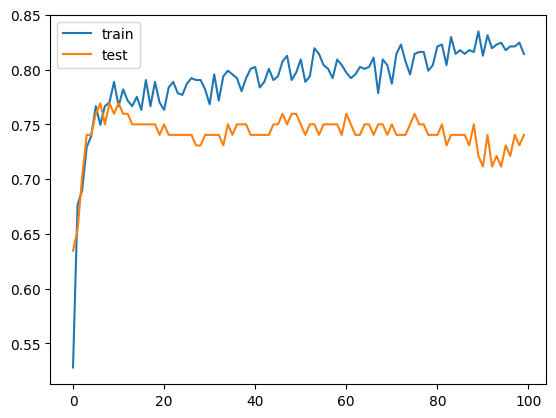

In [17]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred_train= model.predict(X_train_scale)
y_test_train=model.predict(X_test_scale)

In [ ]:
cm = confusion_matrix(y_pred=y_pred_train > 0.5,y_true=y_train)
cm

array([[348,  34],
       [ 51, 154]])

In [ ]:
cm = confusion_matrix(y_pred=y_test_train > 0.5,y_true=y_test)
cm

array([[36, 14],
       [ 8, 19]])

# Add Batch Norm

In [18]:
# Lets build the Model
model = Sequential()
# No of Input will be == (total number of train examples , 8)
# where 8 = feature
model.add(Input(shape=(X_train_scale.shape[1],)))

# Hidden Layer 1
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# Hidden Layer 2
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# Hidden Layer 3
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output Layer - this is a binary classification
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train_scale,y_train,validation_data=(X_val_scale, y_val),epochs=100,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 17ms/step - loss: 0.8240 - accuracy: 0.5639 - val_loss: 0.6277 - val_accuracy: 0.7596
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.6627 - val_loss: 0.5831 - val_accuracy: 0.7885
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.6951 - val_loss: 0.5586 - val_accuracy: 0.7885
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.6917 - val_loss: 0.5424 - val_accuracy: 0.7788
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.7070 - val_loss: 0.5277 - val_accuracy: 0.7692
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5719 - accuracy: 0.7189 - val_loss: 0.5194 - val_accuracy: 0.7596
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5307 - accuracy: 0.7632 - val_loss: 0.5113 - val_accuracy: 0.7596
Epoch 8/100


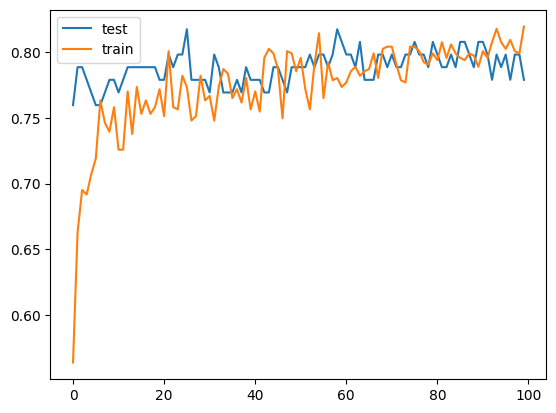

In [21]:
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

Lets lock down the above model.summary() for now and see some optmizers

# Lets look at various optmizers

In [22]:
def create_batchnorm_dropout_model():
    # Lets build the Model
    model = Sequential()
    # No of Input will be == (total number of train examples , 8)
    # where 8 = feature
    model.add(Input(shape=(X_train_scale.shape[1],)))

    # Hidden Layer 1
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # Hidden Layer 2
    model.add(Dense(units=32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # Hidden Layer 3
    model.add(Dense(units=16,activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Output Layer - this is a binary classification
    model.add(Dense(units=1,activation='sigmoid'))
    return model

In [23]:
create_batchnorm_dropout_model().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                     

# Lets get some intution on what these numbers mean
## Check the 1st iteration to find out if the loss is reasonable. Ideally we stop Regularization that mean in this cases no dropout layers and probably no Batch Norm either  to test this out.

In [ ]:
# Check if we have a reason loss value to start withs
m = create_batchnorm_dropout_model()
# Very very low lr and train

m.compile(optimizer=SGD(learning_rate=0.00001),loss='binary_crossentropy',metrics=['accuracy'])
history = m.fit(X_train_scale,y_train,validation_data=(X_val_scale, y_val),epochs=1,verbose=1)

# Question 1 - Does that accuracy value makes sense ??
# Question 2 - Does that loss value makes sense ??

19/19 [==============================] - 1s 10ms/step - loss: 0.9626 - accuracy: 0.4685 - val_loss: 0.7052 - val_accuracy: 0.4231


In [ ]:
from math import log

-log(.4)

0.916290731874155

In [ ]:
# Lets try to train a small subset of data and see if it overfits ! should not be much problem
# we must be able to overfit on a small portion of training data
X_small = X_train[0:10]
y_small = y_train[0:10]
# Check if we have a reason loss value to start with
m = create_batchnorm_dropout_model()
# Very very low lr and train

m.compile(optimizer=SGD(learning_rate=0.00001),loss='binary_crossentropy',metrics=['accuracy'])
history = m.fit(X_small,y_small,epochs=100,validation_data=(X_val_scale, y_val),verbose=1)

# ideally we will end up having a overyly overfit model - which is expected
## MODEL seems to have some SANITY

In [ ]:
# Play around with lr and Dropout - to check whats happening - but this is where we start Hyper param tuning.

# Many many optimizers

In [24]:
def train_with_optimizers(optimizers):
    figs={}
    axs={}
    Tot = 5
    Cols = 2

    # Compute Rows required

    Rows = Tot // Cols
    Rows += Tot % Cols

    # Create a Position index
    figs = pyplot.figure(figsize=(10, 10))
    Position = range(1,Tot + 1)
    for idx,opt in enumerate(optimizers):
        print(idx, ' -- ' , opt)
        model = create_batchnorm_dropout_model()
        model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
        history = model.fit(X_train_scale,y_train,validation_data=(X_val_scale, y_val),epochs=100,verbose=0)
        axs[idx]=figs.add_subplot(Rows,Cols,Position[idx])
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.legend()
        pyplot.title(idx)
    pyplot.show()

In [25]:
lr = 1e-2
# SGD
sgd = SGD(learning_rate=lr)
# SGD with Momentum
sgd_with_momentum = SGD(learning_rate=lr, momentum=0.09)
# SGD with Momentum and Nestrov
sgd_with_momentum_nestrov = SGD(learning_rate=lr, momentum=0.09, nesterov=True)

#rmsprop with momemntum with default discount factor of 0.9 per Keras
rmsprop_with_momentum = RMSprop(learning_rate=1e-1,momentum=0.09)

# Adam -
# beta_1 = The exponential decay rate for the 1st moment estimates
# beta_2 = The exponential decay rate for the 2nd moment estimates
adam = Adam(learning_rate=lr, beta_1=0.89, beta_2 = 0.9)

optimizers_with_default = [SGD(), SGD(momentum=0.09), SGD(momentum=0.09,nesterov=True), RMSprop(momentum=0.09), Adam()]

optimizers = [sgd, sgd_with_momentum, sgd_with_momentum_nestrov, rmsprop_with_momentum, adam]

lr_schedule = ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
optimizers_with_lr_schedule = [SGD(learning_rate=lr_schedule),SGD(learning_rate=lr_schedule,momentum=0.09),SGD(learning_rate=lr_schedule,momentum=0.09,nesterov=True), RMSprop(learning_rate=lr_schedule,momentum=0.09),Adam(learning_rate=lr_schedule)]

# Lets compile with all these optmizers and evaluate

0  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f821186ba30>
1  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310bb0>
2  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310df0>
3  --  <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f8214310c10>
4  --  <keras.optimizer_v2.adam.Adam object at 0x7f82143107f0>


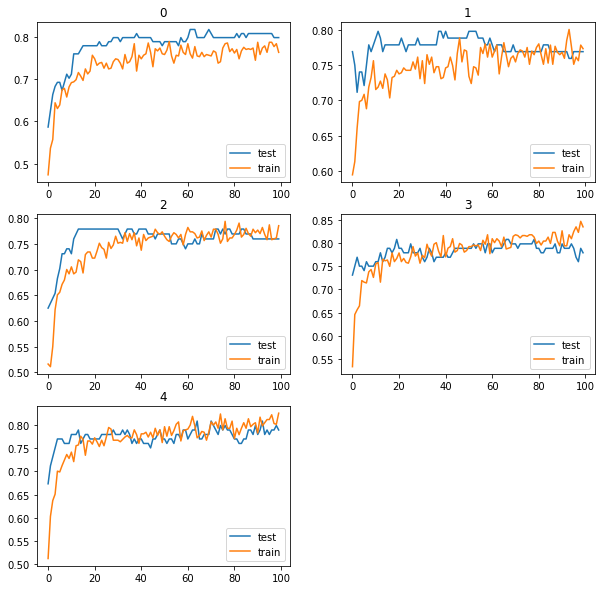

In [ ]:
train_with_optimizers(optimizers_with_default)

0  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310460>
1  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310c70>
2  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310be0>
3  --  <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f8211870670>
4  --  <keras.optimizer_v2.adam.Adam object at 0x7f8214310ca0>


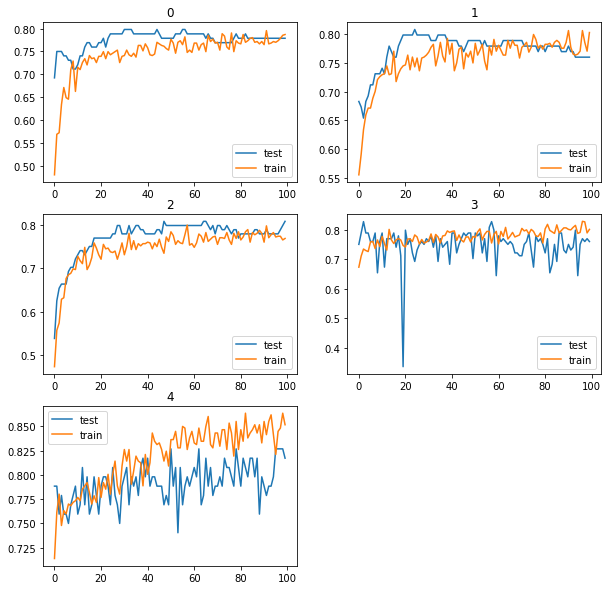

In [ ]:
train_with_optimizers(optimizers=optimizers)

0  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310c40>
1  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310760>
2  --  <keras.optimizer_v2.gradient_descent.SGD object at 0x7f8214310670>
3  --  <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f82143106a0>
4  --  <keras.optimizer_v2.adam.Adam object at 0x7f8214310610>


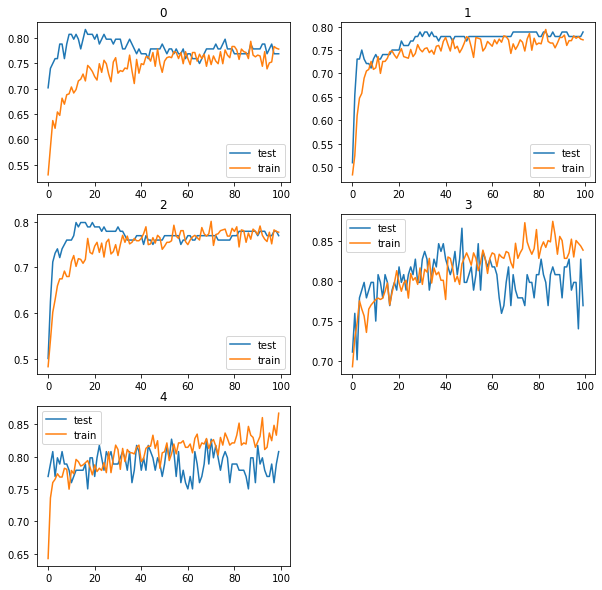

In [ ]:
train_with_optimizers(optimizers=optimizers_with_lr_schedule)

# Hyper Param Tuning

In [27]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [28]:
import keras_tuner as kt

In [29]:
# Write a function that creates and returns a Keras model.
# Use the hp argument to define the hyperparameters during model creation.
def build_hpt_model(hp):

    # Lets build the Model
    model = Sequential()
    model.add(Input(shape=(X_train_scale.shape[1],)))
    # Hidden Layer 1
    model.add(Dense(units=hp.Int("units1",min_value=32, max_value=1024, step=16),
                    activation=hp.Choice("activation1",["relu", "tanh"])))
    model.add(Dropout(hp.Float("rate1",min_value=0.1, max_value=0.4, step=0.1)))
    model.add(BatchNormalization())
    # Hidden Layer 2
    model.add(Dense(units=hp.Int("units2",min_value=32, max_value=128, step=16),
                activation=hp.Choice("activation2",["relu", "tanh"])))
    model.add(Dropout(hp.Float("rate2",min_value=0.1, max_value=0.4, step=0.1)))
    model.add(BatchNormalization())
    # Hidden Layer 3
    model.add(Dense(units=hp.Int("units3",min_value=16, max_value=64, step=16),
            activation=hp.Choice("activation3",["relu", "tanh"])))
    model.add(Dropout(hp.Float("rate3",min_value=0.1, max_value=0.4, step=0.1)))
    model.add(BatchNormalization())

    # Output Layer - this is a binary classification
    model.add(Dense(units=1,activation='sigmoid'))


    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer=Adam(learning_rate=learning_rate)
    # optimizer = SGD(learning_rate=learning_rate,momentum=0.09,nesterov=True)
    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

    return model

In [30]:
build_hpt_model(kt.HyperParameters())

In [31]:
tuner = kt.RandomSearch(
    hypermodel=build_hpt_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="simpl_diabetes",
)
tuner.search_space_summary()

Search space summary
Default search space size: 10
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 16, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
rate1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
rate2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.4, 'step': 0.1, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
rate3 (Float)
{'default': 0.1, 'conditio

In [32]:
tuner.search(X_train_scale,y_train, epochs=10, validation_data=(X_val_scale, y_val))

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.8028846085071564

Best val_accuracy So Far: 0.8076923191547394
Total elapsed time: 00h 00m 35s


In [33]:
tuner.get_best_hyperparameters()[0].get_config()['values']

{'units1': 960,
 'activation1': 'relu',
 'rate1': 0.1,
 'units2': 128,
 'activation2': 'tanh',
 'rate2': 0.2,
 'units3': 48,
 'activation3': 'relu',
 'rate3': 0.2,
 'lr': 0.0036005031993975646}

In [34]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
# best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 960)               8640      
                                                                 
 dropout (Dropout)           (None, 960)               0         
                                                                 
 batch_normalization (Batch  (None, 960)               3840      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               123008    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

In [ ]:
# Take the best hyper param, little bit tune again and recreate a model
# take it to production

# Interpretability

In [ ]:
!pip install lime

In [ ]:
# Refer to -- https://www.geeksforgeeks.org/introduction-to-explainable-aixai-using-lime/

# Importing the module for LimeTabularExplainer
import lime.lime_tabular

# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_scale,
                                                        feature_names=X.columns,
                                                        verbose=True, mode='regression')

In [ ]:
!pip install fairlearn

In [ ]:
import shap

In [ ]:
ex = shap.KernelExplainer(models[0].predict, X_train_scale)

Using 587 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


100%|██████████| 77/77 [02:47<00:00,  2.17s/it]


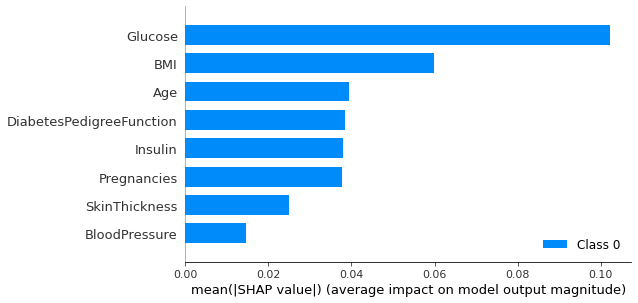

In [ ]:
shap_vals =ex.shap_values(X_test_scale)
shap.summary_plot(shap_vals, X_test_scale, X.columns)